# Informe

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') 
plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid")

In [22]:
def get_postulaciones():
    postulaciones = pd.read_csv('data/fiuba_4_postulaciones.csv')
    columns_rename = {'idaviso': 'id_aviso', 'idpostulante': 'id_postulante', 'fechapostulacion': 'fecha_postulacion'}
    postulaciones = postulaciones.rename(columns=columns_rename)
    postulaciones['fecha_postulacion']=pd.to_datetime(postulaciones['fecha_postulacion'])
    return postulaciones

def get_avisos_detalle():
    avisos_detalle = pd.read_csv('data/fiuba_6_avisos_detalle.csv')
    columns_rename = {'idpostulante': 'id_postulante', 'idaviso': 'id_aviso'}
    avisos_detalle = avisos_detalle.rename(columns=columns_rename)
    to_nivel_laboral_nro = {'Senior / Semi-Senior' : 2, 'Junior':1, 'Otro':0,
       'Jefe / Supervisor / Responsable':3,
       'Gerencia / Alta Gerencia / Dirección':4}
    avisos_detalle['nivel_laboral_nro']= avisos_detalle['nivel_laboral'].map(to_nivel_laboral_nro)
    return avisos_detalle

def get_year_of_birth(postulantes_genero_edad):
    return (pd.to_datetime
            (postulantes_genero_edad['fechanacimiento'], errors='coerce', format='%Y-%m-%d')
            .dt.year)

def get_age(yearOfBirth):
    return 2018 - yearOfBirth
    
def get_age_range(yearOfBirth):
    age = get_age(yearOfBirth)
    if(age<25): return 'Entre 18 y 24'
    if(age<30): return 'Entre 25 y 30'
    if(age<35): return 'Entre 30 y 35'
    if(age<40): return 'Entre 35 y 40'
    if(age<45): return 'Entre 40 y 45'
    if(age<50): return 'Entre 45 y 50'
    return 'Mayor de 50'

def get_order_for_age_range():
    return ['Entre 18 y 24', 'Entre 25 y 30','Entre 30 y 35','Entre 35 y 40','Entre 40 y 45','Entre 45 y 50', 'Mayor de 50']

def get_postulantes_genero_edad():
    postulantes_genero_edad = pd.read_csv('data/fiuba_2_postulantes_genero_y_edad.csv')
    postulantes_genero_edad['año_nacimiento_postulante']=get_year_of_birth(postulantes_genero_edad)
    postulantes_genero_edad['edad_postulante']=postulantes_genero_edad['año_nacimiento_postulante'].map(get_age, na_action=None)
    postulantes_genero_edad['rango_edad_postulante']=postulantes_genero_edad['año_nacimiento_postulante'].map(get_age_range, na_action=None)
    columns_rename = {'idpostulante': 'id_postulante', 'fechanacimiento': 'fecha_nacimiento_postulante', 'sexo': 'genero_postulante'}
    postulantes_genero_edad = postulantes_genero_edad.rename(columns=columns_rename)
    postulantes_genero_edad = postulantes_genero_edad[['id_postulante', 'genero_postulante', 'fecha_nacimiento_postulante', 'edad_postulante', 'rango_edad_postulante']]
    postulantes_genero_edad['genero_postulante'] = postulantes_genero_edad['genero_postulante'].map({'FEM': 'Femenino', 'MASC': 'Masculino', 'NO_DECLARA': 'No declara'})
    #Nos interesan los que indicaron el genero para la historia que queremos contar
    return postulantes_genero_edad[postulantes_genero_edad['genero_postulante']!='No declara']

def get_detalle_postulaciones():
    postulaciones = get_postulaciones()
    avisos = get_avisos_detalle()
    postulantes = get_postulantes_genero_edad()
    detalle_postulaciones = pd.merge(postulantes, postulaciones, on='id_postulante', how='inner') 
    detalle_postulaciones = pd.merge(detalle_postulaciones, avisos, on='id_aviso', how='inner')
    return detalle_postulaciones

def get_top_for(df, categorical_key, top_size):
    top_values = df[categorical_key].value_counts().head(top_size).index
    return df[df[categorical_key].isin(top_values)]

Analisis de postulacioens por genero

In [23]:
postulaciones = get_detalle_postulaciones()
postulaciones_mujeres = postulaciones[postulaciones['genero_postulante']=='Femenino']
postulaciones_varones = postulaciones[postulaciones['genero_postulante']=='Masculino']

postulaciones.head(50)

,id_postulante,genero_postulante,fecha_nacimiento_postulante,edad_postulante,rango_edad_postulante,id_aviso,fecha_postulacion,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa,nivel_laboral_nro
0,NM5M,Femenino,1970-12-03,48.0,Entre 45 y 50,1112257047,2018-01-15 16:22:34,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA,0
1,8krKL,Masculino,1972-11-06,46.0,Entre 45 y 50,1112257047,2018-01-21 09:45:13,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA,0
2,EDEpY4,Femenino,1980-05-22,38.0,Entre 35 y 40,1112257047,2018-01-15 09:07:25,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA,0
3,1lejrO,Femenino,1968-05-05,50.0,Mayor de 50,1112257047,2018-01-16 06:01:50,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA,0
4,Y0MNYJ,Femenino,1977-02-28,41.0,Entre 40 y 45,1112257047,2018-01-16 16:22:36,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA,0
5,1lGQr3,Femenino,1977-10-21,41.0,Entre 40 y 45,1112257047,2018-01-19 08:18:33,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA,0
6,eXElKj,Femenino,1973-12-23,45.0,Entre 45 y 50,1112257047,2018-01-24 07:21:13,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA,0
7,NM2bpB,Femenino,1969-03-20,49.0,Entre 45 y 50,1112257047,2018-02-01 09:09:12,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA,0
8,YlQ8GX,Masculino,1976-07-23,42.0,Entre 40 y 45,1112257047,2018-01-22 13:38:52,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA,0
9,8ZxR5z,Femenino,1975-12-08,43.0,Entre 40 y 45,1112257047,2018-01-25 10:14:45,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA,0


# Las mujeres acceden menos a las posiciones gerenciales

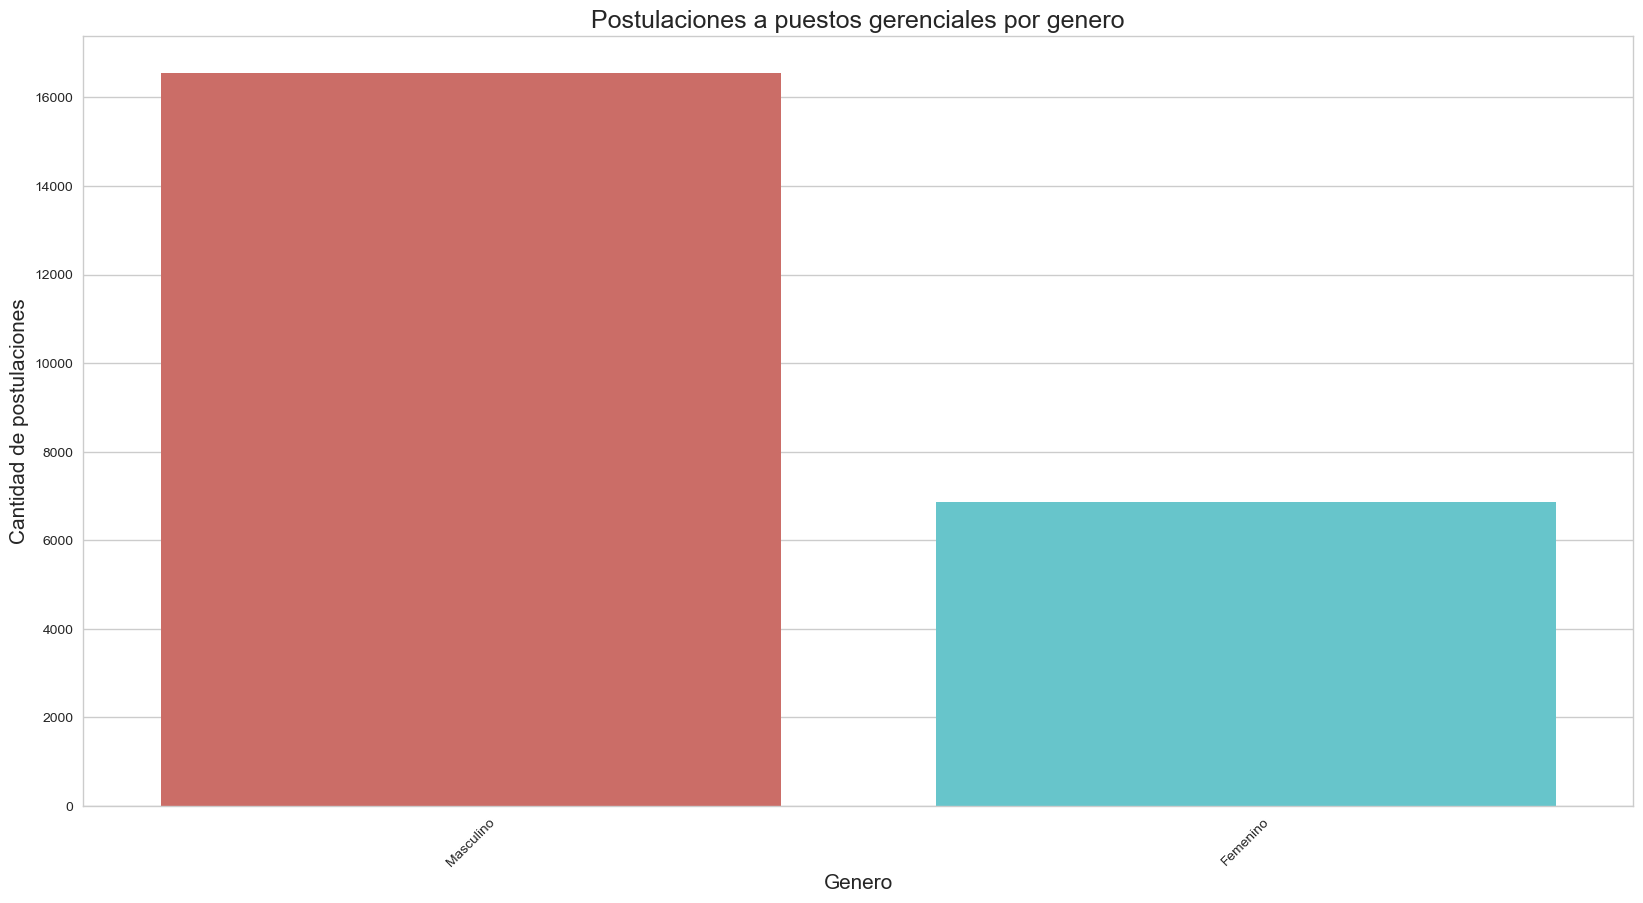

In [6]:
postulaciones_gerencia = postulaciones[postulaciones['nivel_laboral']=='Gerencia / Alta Gerencia / Dirección']
g = sns.countplot(x='genero_postulante', data=postulaciones_gerencia, orient='v', palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Genero", fontsize=15)
g.set_ylabel("Cantidad de postulaciones", fontsize=15)
g.set_title("Postulaciones a puestos gerenciales por genero", fontsize=18)

# Entre los 25 y los 35 años la brecha se hace + grande

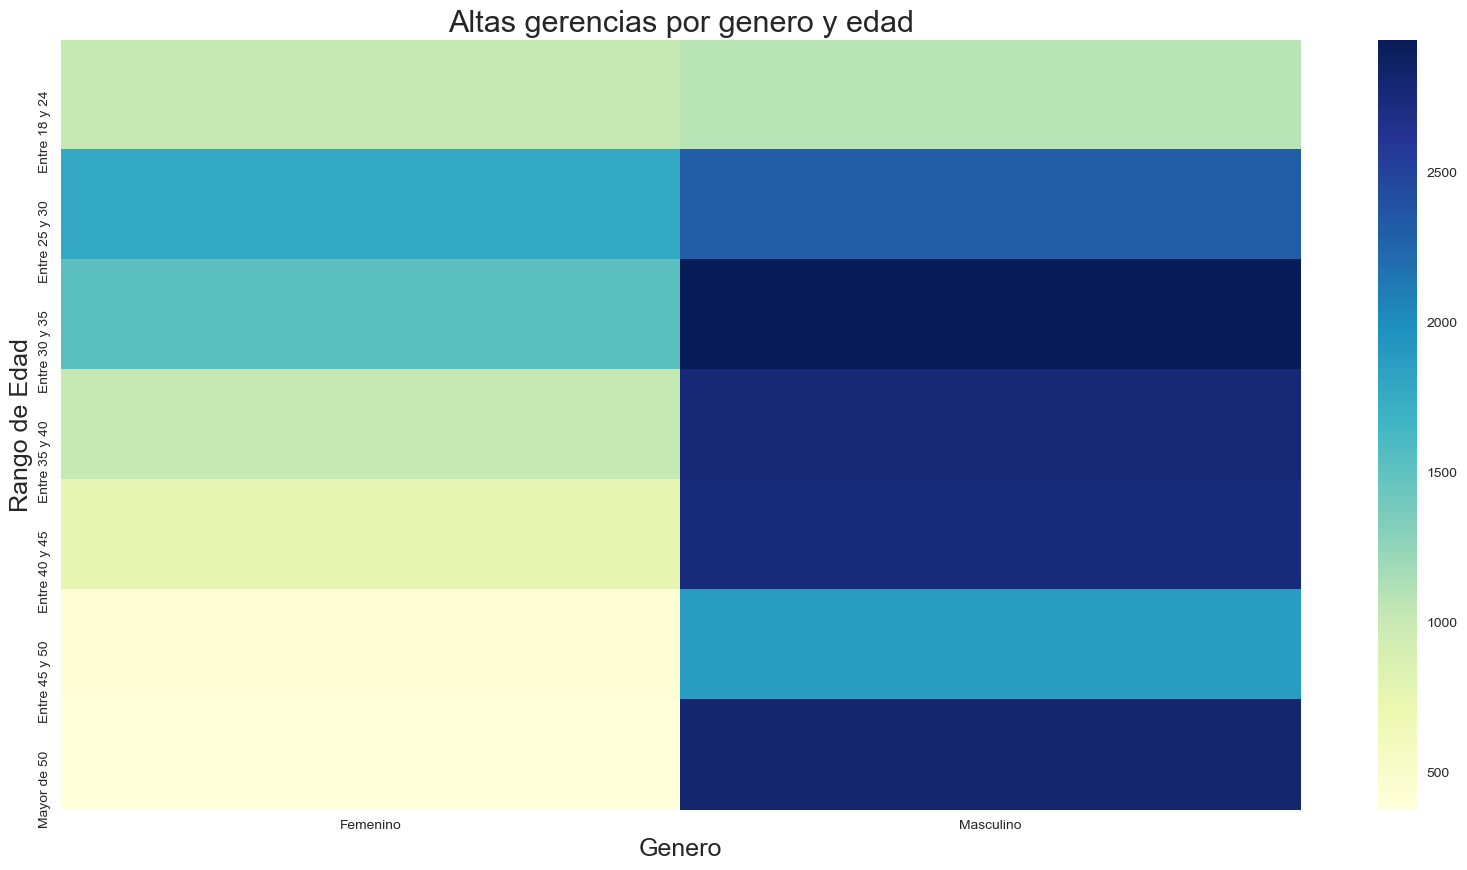

In [8]:
heatmap_gerencia = postulaciones_gerencia.pivot_table(index='rango_edad_postulante', columns='genero_postulante', values='id_postulante', aggfunc='count')

g = sns.heatmap(heatmap_gerencia,  cmap="YlGnBu")
g.set_title("Altas gerencias por genero y edad", fontsize=22)
g.set_xlabel("Genero",fontsize=18)
g.set_ylabel("Rango de Edad", fontsize=18)

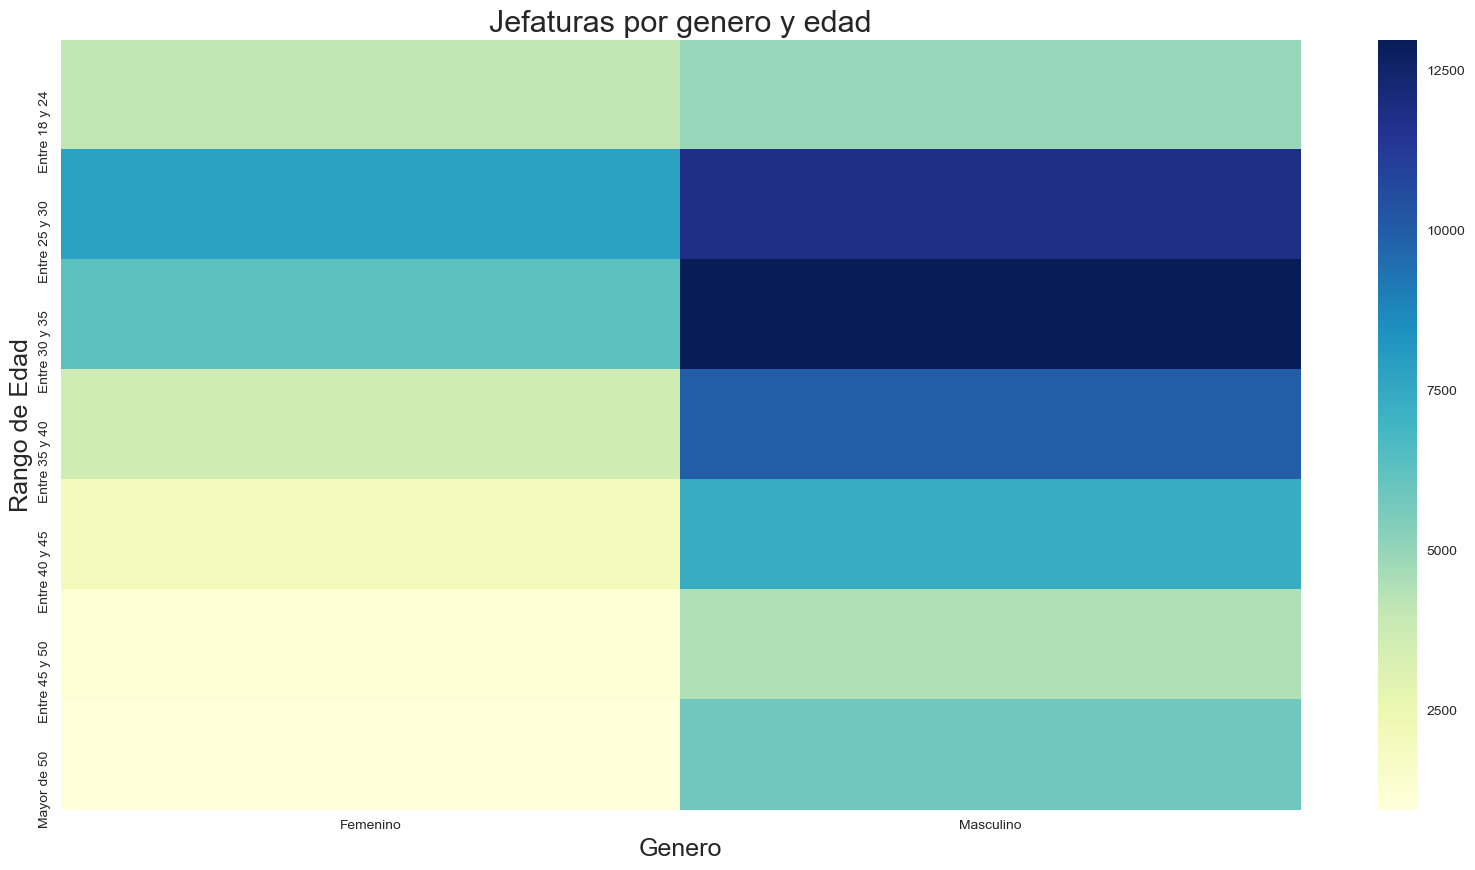

In [9]:
postulaciones_jefatura = postulaciones[postulaciones['nivel_laboral']=='Jefe / Supervisor / Responsable']

heatmap_jefatura = postulaciones_jefatura.pivot_table(index='rango_edad_postulante', columns='genero_postulante', values='id_postulante', aggfunc='count')

g = sns.heatmap(heatmap_jefatura,  cmap="YlGnBu")
g.set_title("Jefaturas por genero y edad", fontsize=22)
g.set_xlabel("Genero",fontsize=18)
g.set_ylabel("Rango de Edad", fontsize=18)

# No pasa lo mismo con otros tipos de trabajo, como los Junior

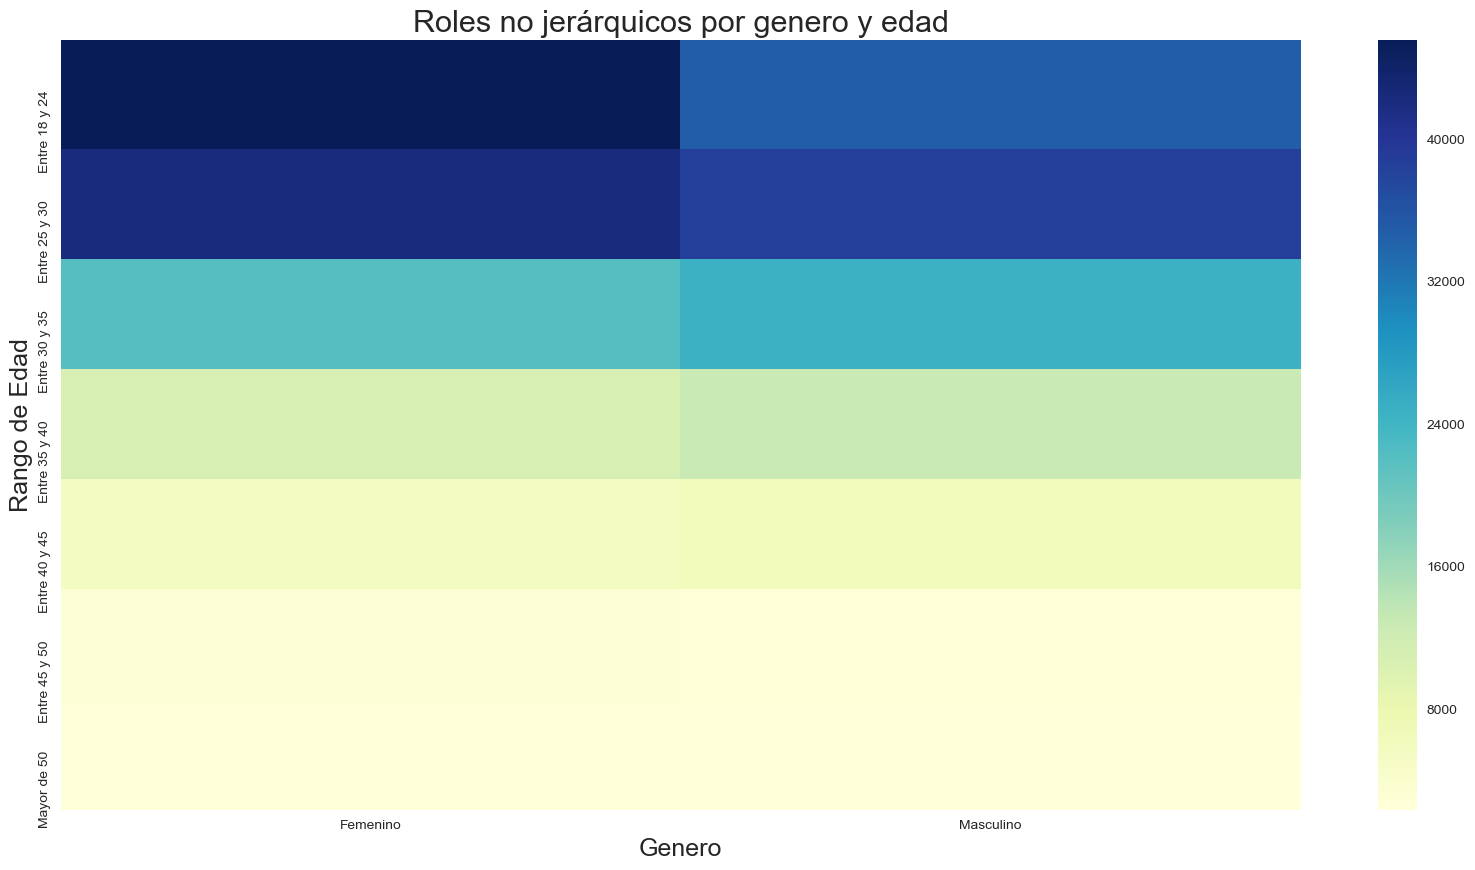

In [10]:
postulaciones_junior = postulaciones[postulaciones['nivel_laboral']=='Otro']

heatmap_junior = postulaciones_junior.pivot_table(index='rango_edad_postulante', columns='genero_postulante', values='id_postulante', aggfunc='count')

g = sns.heatmap(heatmap_junior,  cmap="YlGnBu")
g.set_title("Roles no jerárquicos por genero y edad", fontsize=22)
g.set_xlabel("Genero",fontsize=18)
g.set_ylabel("Rango de Edad", fontsize=18)

# Lo mismo sucede con las jefaturas

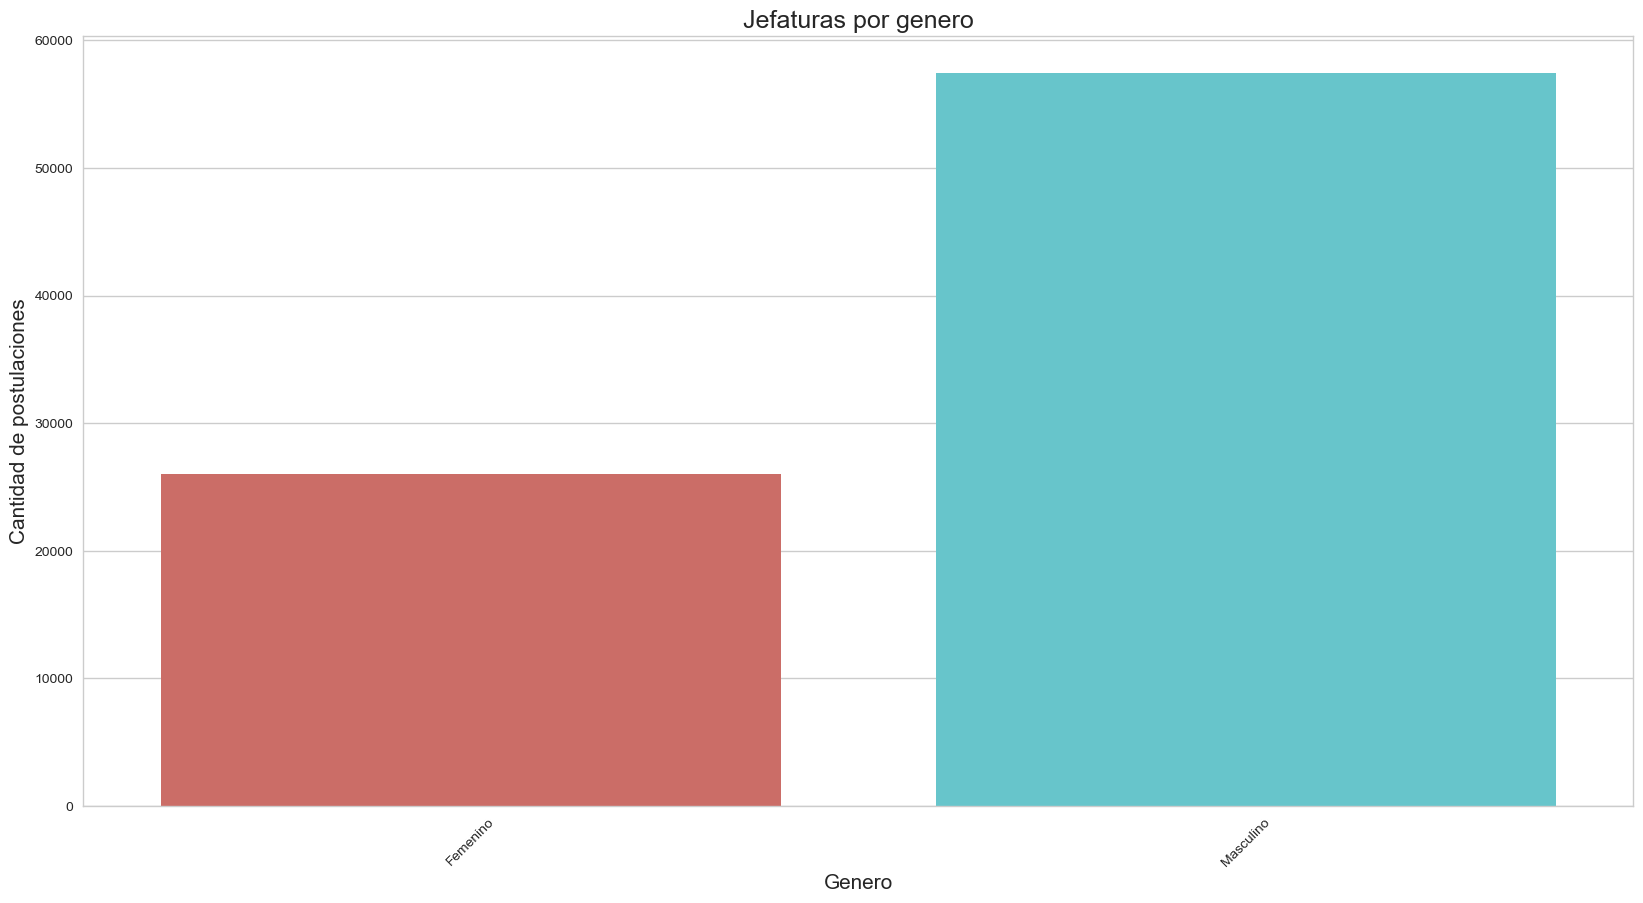

In [11]:
postulaciones_junior = postulaciones[postulaciones['nivel_laboral']=='Jefe / Supervisor / Responsable']
g = sns.countplot(x='genero_postulante', data=postulaciones_junior, orient='v', palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Genero", fontsize=15)
g.set_ylabel("Cantidad de postulaciones", fontsize=15)
g.set_title("Jefaturas por genero", fontsize=18)

# No sucede lo mismo con las posiciones no jearquizadas

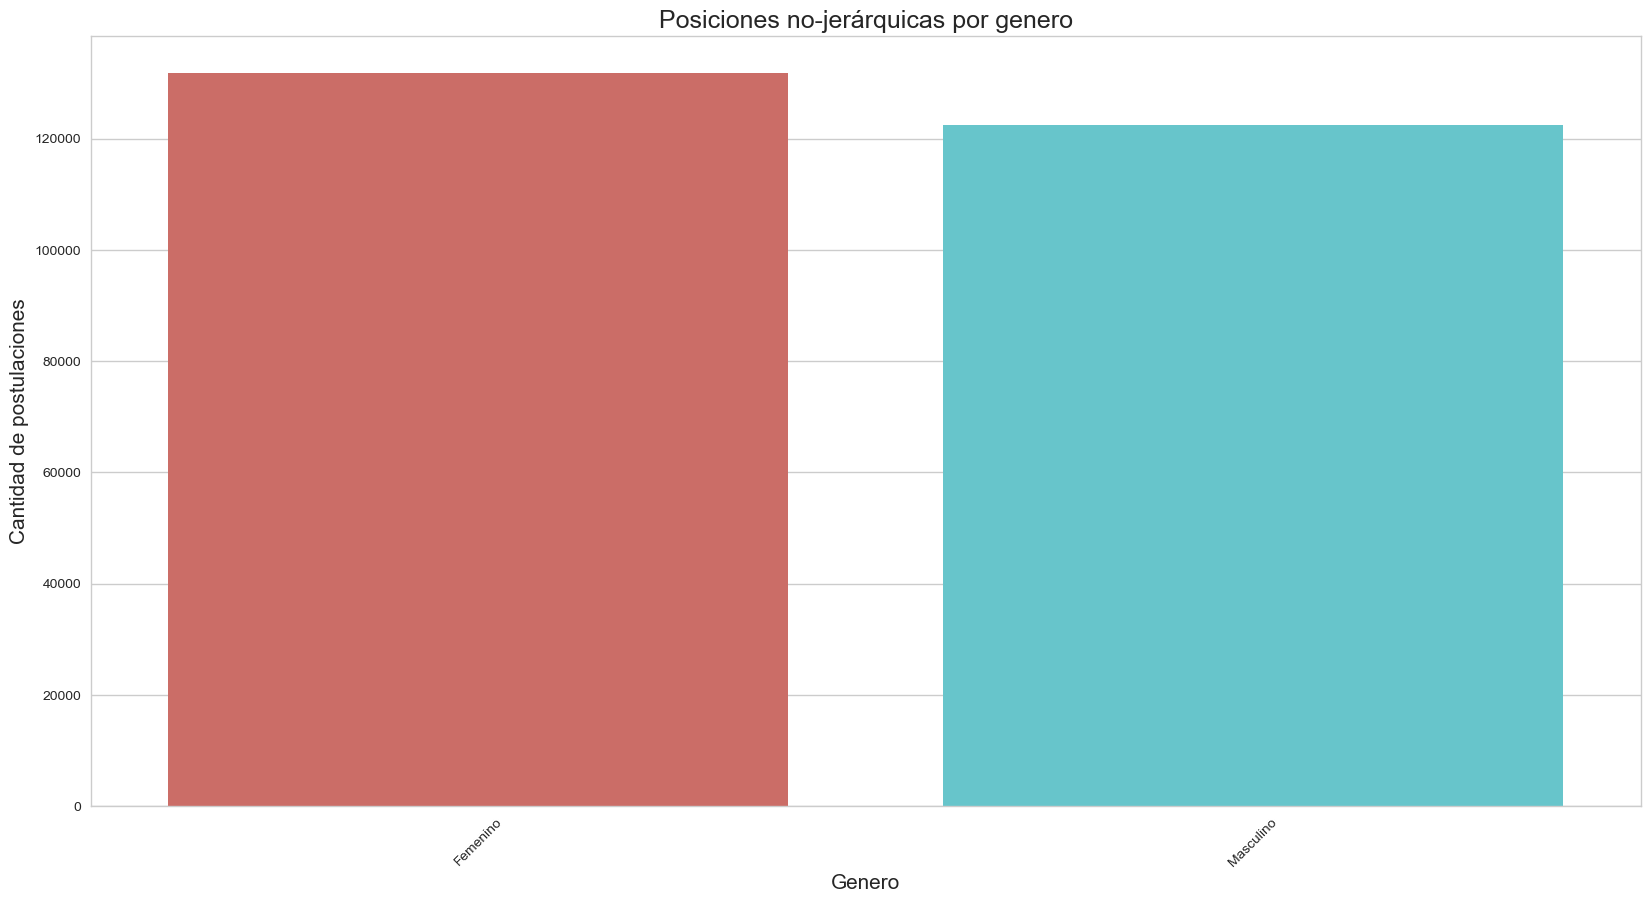

In [12]:
postulaciones_junior = postulaciones[postulaciones['nivel_laboral']=='Otro']
g = sns.countplot(x='genero_postulante', data=postulaciones_junior, orient='v', palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Genero", fontsize=15)
g.set_ylabel("Cantidad de postulaciones", fontsize=15)
g.set_title("Posiciones no-jerárquicas por genero", fontsize=18)

In [13]:
grouped=postulaciones_gerencia.groupby(['genero_postulante']).agg('count')
g = sns.pairplot(data=postulaciones_gerencia, x_vars=["rango_edad_postulante"], y_vars=["id_postulante"], hue='genero_postulante');



ValueError: could not convert string to float: 'rmdWmQx'

ValueError: could not convert string to float: 'rmdWmQx'

# Las personas eligen trabajos full time.

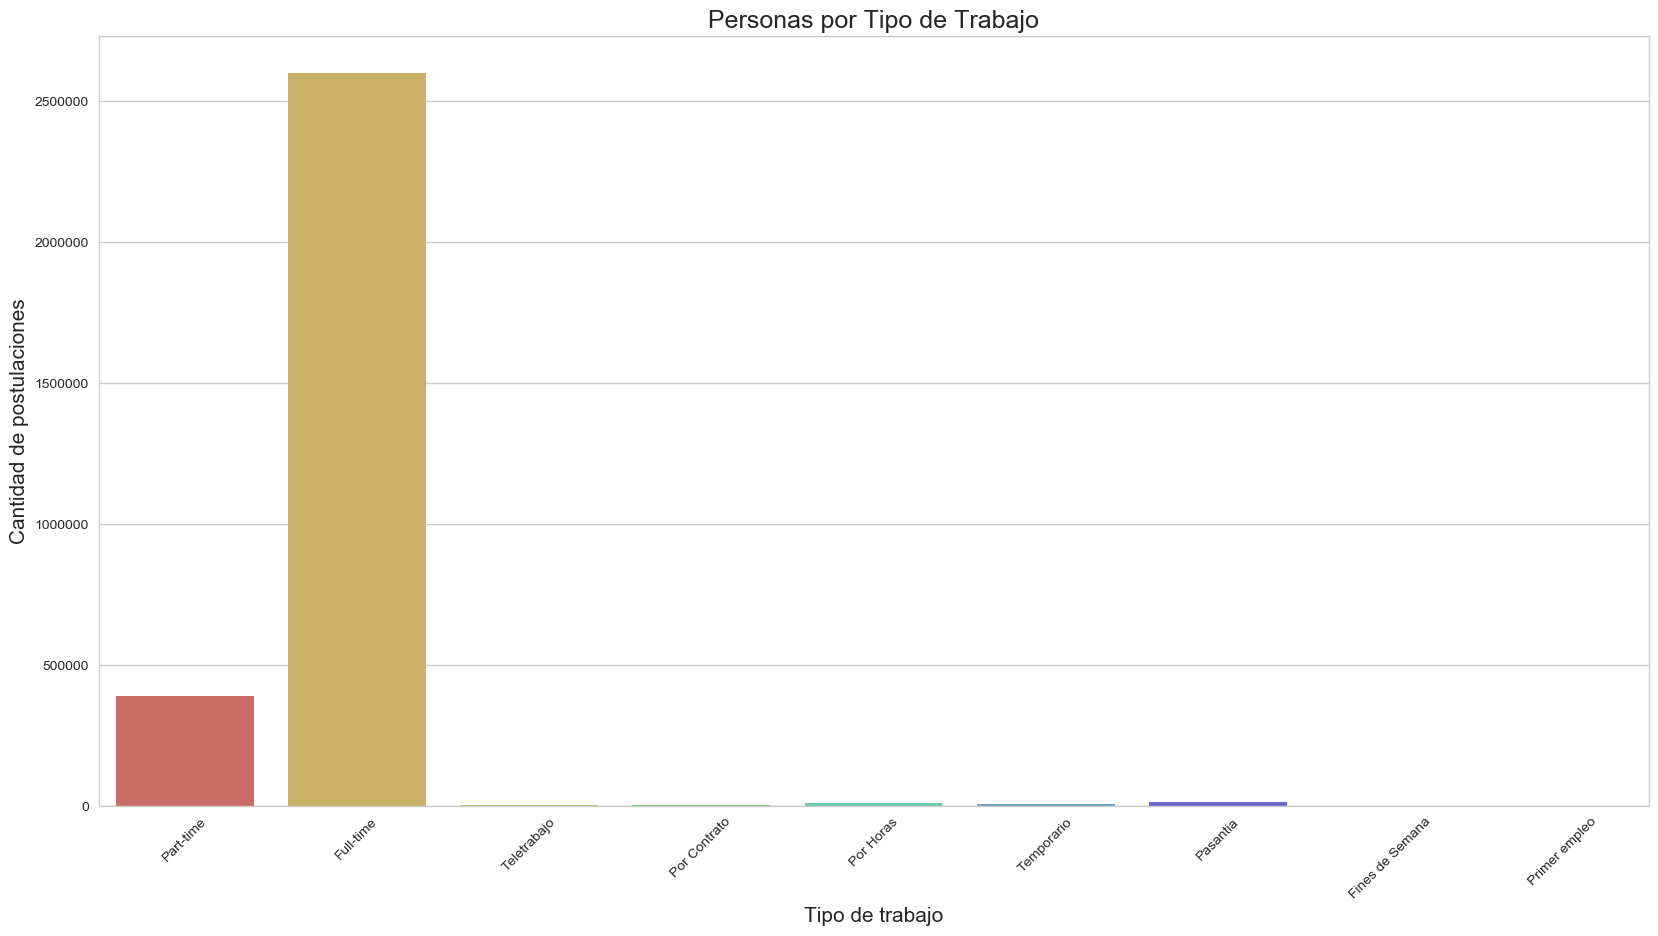

In [14]:
postulaciones_varones = postulaciones[postulaciones['genero_postulante']=='Masculino']

g = sns.countplot(x='tipo_de_trabajo', data=postulaciones, orient='v', palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Tipo de trabajo", fontsize=15)
g.set_ylabel("Cantidad de postulaciones", fontsize=15)
g.set_title("Personas por Tipo de Trabajo", fontsize=18)

# Los hombres sobre todo eligen full-time

Text(0.5,1,'Personas por Tipo de Trabajo')

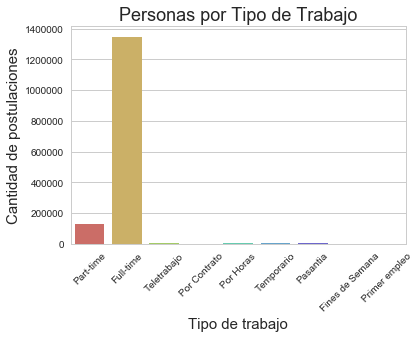

In [58]:
postulaciones_varones = postulaciones[postulaciones['genero_postulante']=='Masculino']

g = sns.countplot(x='tipo_de_trabajo', data=postulaciones_varones, orient='v', palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Tipo de trabajo", fontsize=15)
g.set_ylabel("Cantidad de postulaciones", fontsize=15)
g.set_title("Varones por Tipo de Trabajo", fontsize=18)

Text(0.5,1,'Que nivel jerarquico hay en los trabajos full time')

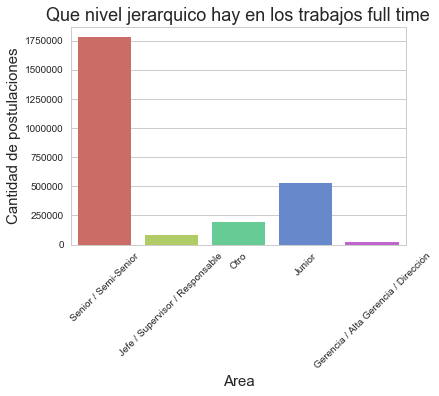

In [61]:
postulaciones_full_time = postulaciones[postulaciones['tipo_de_trabajo']=='Full-time']

g = sns.countplot(x='nivel_laboral', data=postulaciones_full_time, orient='v', palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Area", fontsize=15)
g.set_ylabel("Cantidad de postulaciones", fontsize=15)
g.set_title("Que nivel jerarquico hay en los trabajos full time", fontsize=18)


Text(0.5,1,'Que nivel jerarquico hay en los trabajos full time')

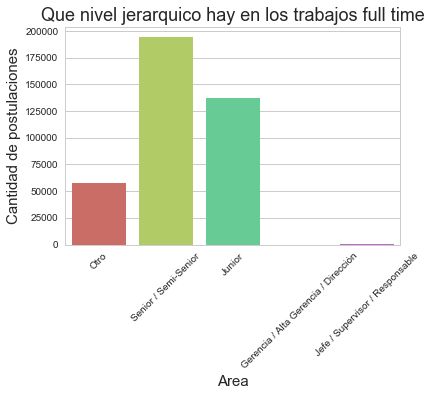

In [62]:
postulaciones_part_time = postulaciones[postulaciones['tipo_de_trabajo']=='Part-time']

g = sns.countplot(x='nivel_laboral', data=postulaciones_part_time, orient='v', palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Area", fontsize=15)
g.set_ylabel("Cantidad de postulaciones", fontsize=15)
g.set_title("Que nivel jerarquico hay en los trabajos full time", fontsize=18)

Text(0.5,1,'Que nivel jerarquico en los trabajos los fines de semana')

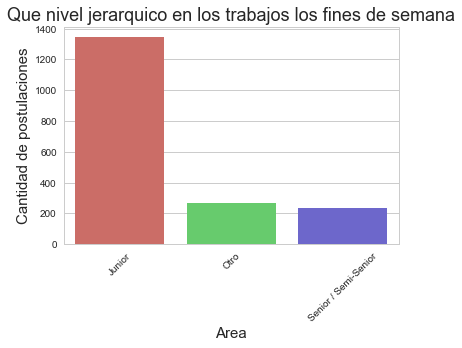

In [65]:
postulaciones_fines_de_semana = postulaciones[postulaciones['tipo_de_trabajo']=='Fines de Semana']

g = sns.countplot(x='nivel_laboral', data=postulaciones_fines_de_semana, orient='v', palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Area", fontsize=15)
g.set_ylabel("Cantidad de postulaciones", fontsize=15)
g.set_title("Que nivel jerarquico en los trabajos los fines de semana", fontsize=18)

# Las chicas eligen trabajar los fines de semana

Text(0.5,1,'Quienes eligen trabajar el fin de semana')

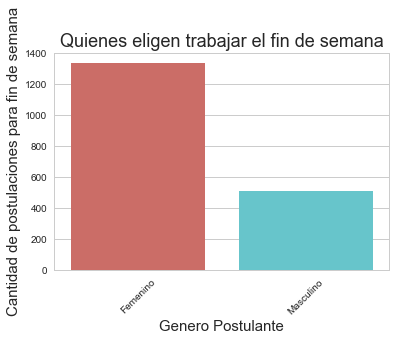

In [10]:
postulaciones_fines_de_semana = postulaciones[postulaciones['tipo_de_trabajo']=='Fines de Semana']

g = sns.countplot(x='genero_postulante', data=postulaciones_fines_de_semana, orient='v', palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Genero Postulante", fontsize=15)
g.set_ylabel("Cantidad de postulaciones para fin de semana", fontsize=15)
g.set_title("Quienes eligen trabajar el fin de semana", fontsize=18)

# Que trabajos son los mas populares los fines de semanas

Text(0.5,1,'Que trabajos hay los fines de semana')

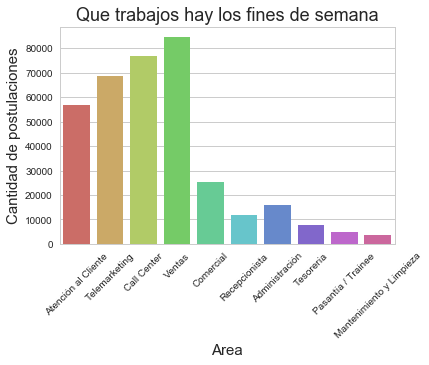

In [11]:
postulaciones_part_time = get_top_for(postulaciones[postulaciones['tipo_de_trabajo']=='Part-time'], 'nombre_area', 10)
g = sns.countplot(x='nombre_area', data=postulaciones_part_time, orient='v', palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Area", fontsize=15)
g.set_ylabel("Cantidad de postulaciones", fontsize=15)
g.set_title("Que trabajos hay los fines de semana", fontsize=18)

# Las chicas eligen los trabajos part time

Text(0.5,1,'Quienes eligen part-time')

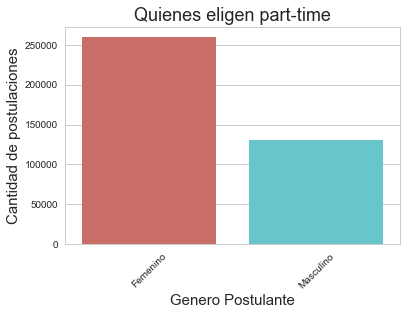

In [12]:
postulaciones_part_time = postulaciones[postulaciones['tipo_de_trabajo']=='Part-time']

g = sns.countplot(x='genero_postulante', data=postulaciones_part_time, orient='v', palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Genero Postulante", fontsize=15)
g.set_ylabel("Cantidad de postulaciones", fontsize=15)
g.set_title("Quienes eligen part-time", fontsize=18)

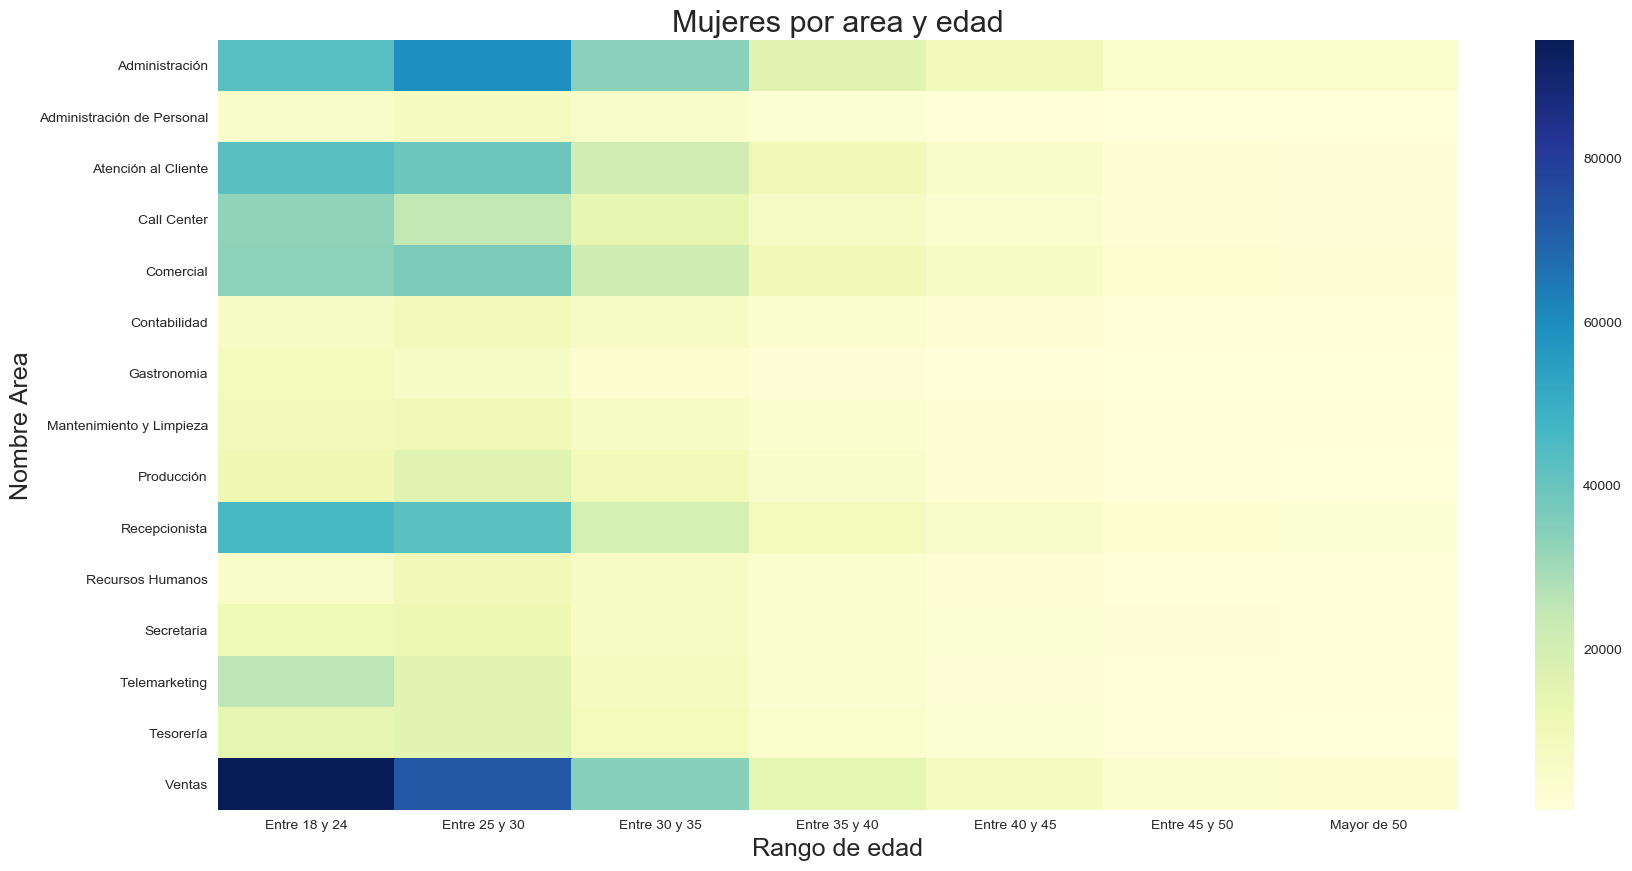

In [60]:
postulaciones_mujeres_top = get_top_for(postulaciones_mujeres,'nombre_area',15)
heatmap_mujeres = postulaciones_mujeres_top.pivot_table(index='nombre_area', columns='rango_edad_postulante', values='id_postulante', aggfunc='count')
g = sns.heatmap(heatmap_mujeres,  cmap="YlGnBu")
g.set_title("Mujeres por area y edad", fontsize=22)
g.set_xlabel("Rango de edad",fontsize=18)
g.set_ylabel("Nombre Area", fontsize=18)

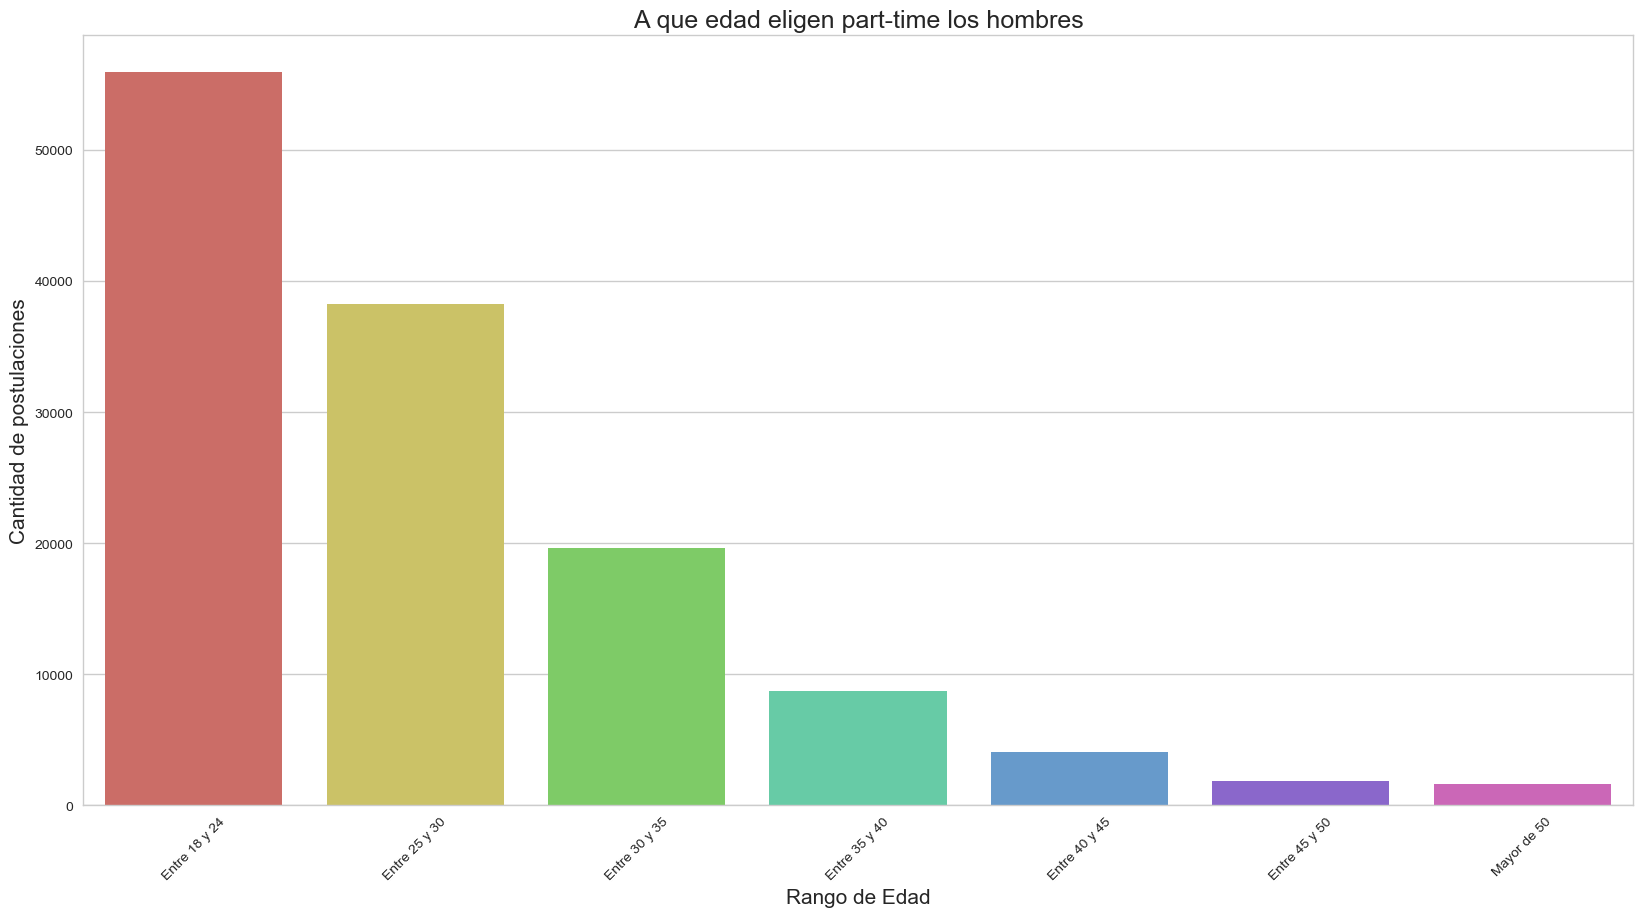

In [61]:
postulaciones_part_time = postulaciones[postulaciones['tipo_de_trabajo']=='Part-time']
postulaciones_hombres_part_time = postulaciones_part_time[postulaciones_part_time['genero_postulante']=='Masculino']
g = sns.countplot(x='rango_edad_postulante', data=postulaciones_hombres_part_time, order=get_order_for_age_range(), orient='v', palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Rango de Edad", fontsize=15)
g.set_ylabel("Cantidad de postulaciones", fontsize=15)
g.set_title("A que edad eligen part-time los hombres", fontsize=18)

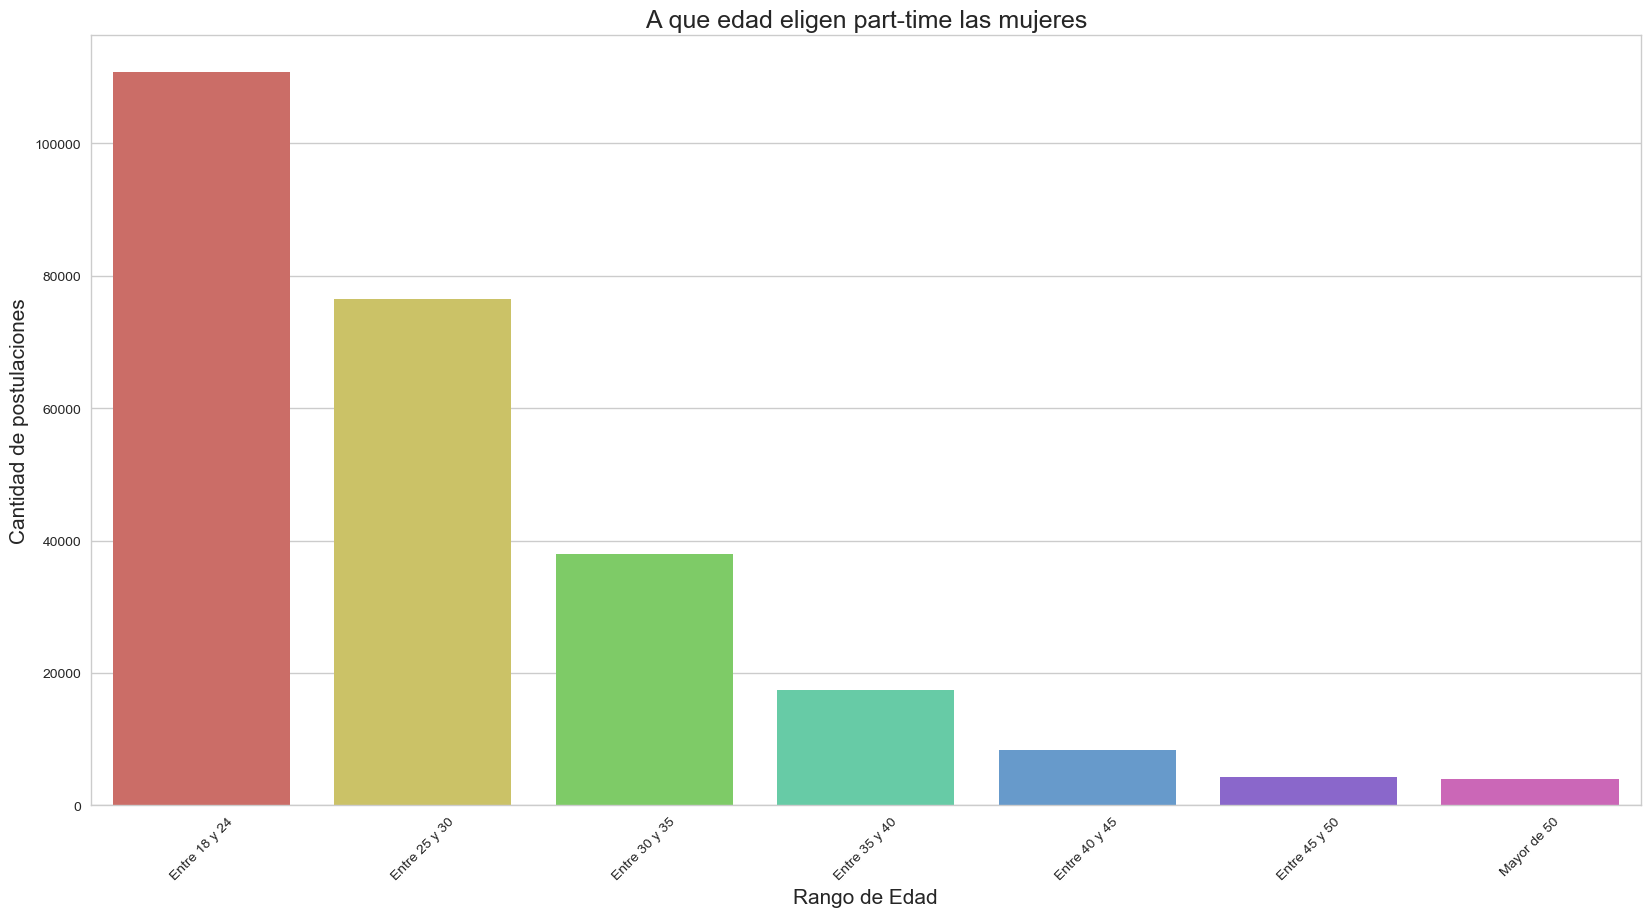

In [62]:
postulaciones_part_time = postulaciones[postulaciones['tipo_de_trabajo']=='Part-time']
order_age_range = ['Entre 18 y 24', 'Entre 25 y 30','Entre 30 y 35','Entre 35 y 40','Entre 40 y 45','Entre 45 y 50', 'Mayor de 50']
postulaciones_mujeres_part_time = postulaciones_part_time[postulaciones_part_time['genero_postulante']=='Femenino']
g = sns.countplot(x='rango_edad_postulante', data=postulaciones_mujeres_part_time, order =get_order_for_age_range(), orient='v', palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Rango de Edad", fontsize=15)
g.set_ylabel("Cantidad de postulaciones", fontsize=15)
g.set_title("A que edad eligen part-time las mujeres", fontsize=18)

In [63]:
postulaciones['genero_postulante'].value_counts()

Femenino     1535476
Masculino    1499248
Name: genero_postulante, dtype: int64

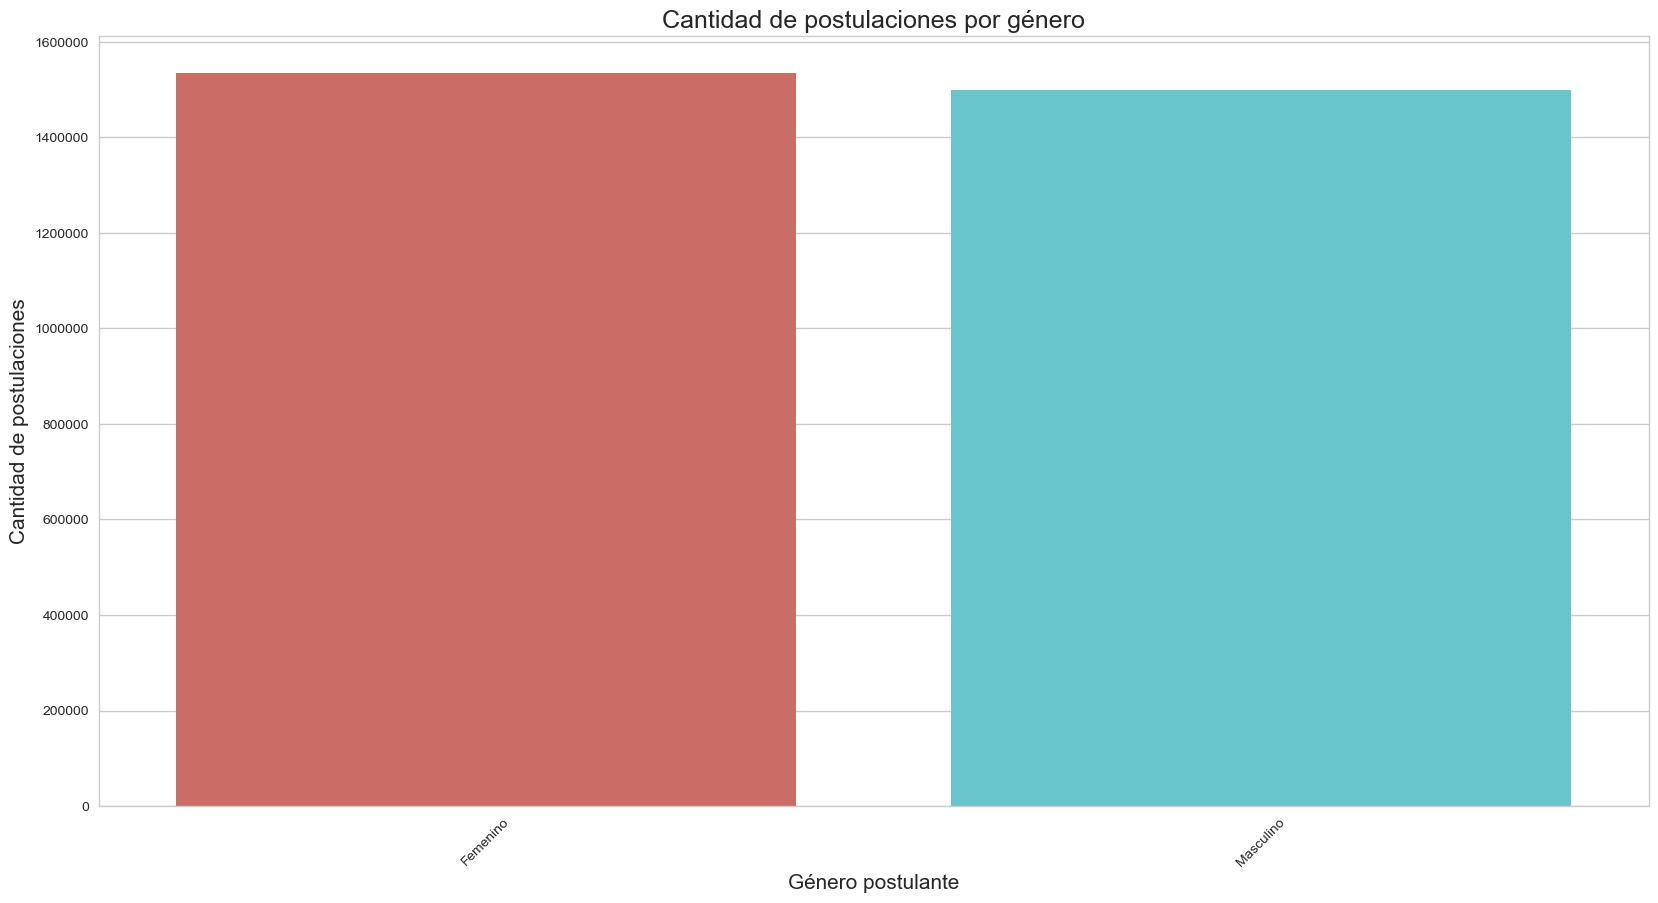

In [64]:
g = sns.countplot(x='genero_postulante', data=postulaciones, orient='v', palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Género postulante", fontsize=15)
g.set_ylabel("Cantidad de postulaciones", fontsize=15)
g.set_title("Cantidad de postulaciones por género", fontsize=18)

# Los hombres eligen producción

In [65]:
top_10_postulaciones = get_top_for(postulaciones,'nombre_area',10)

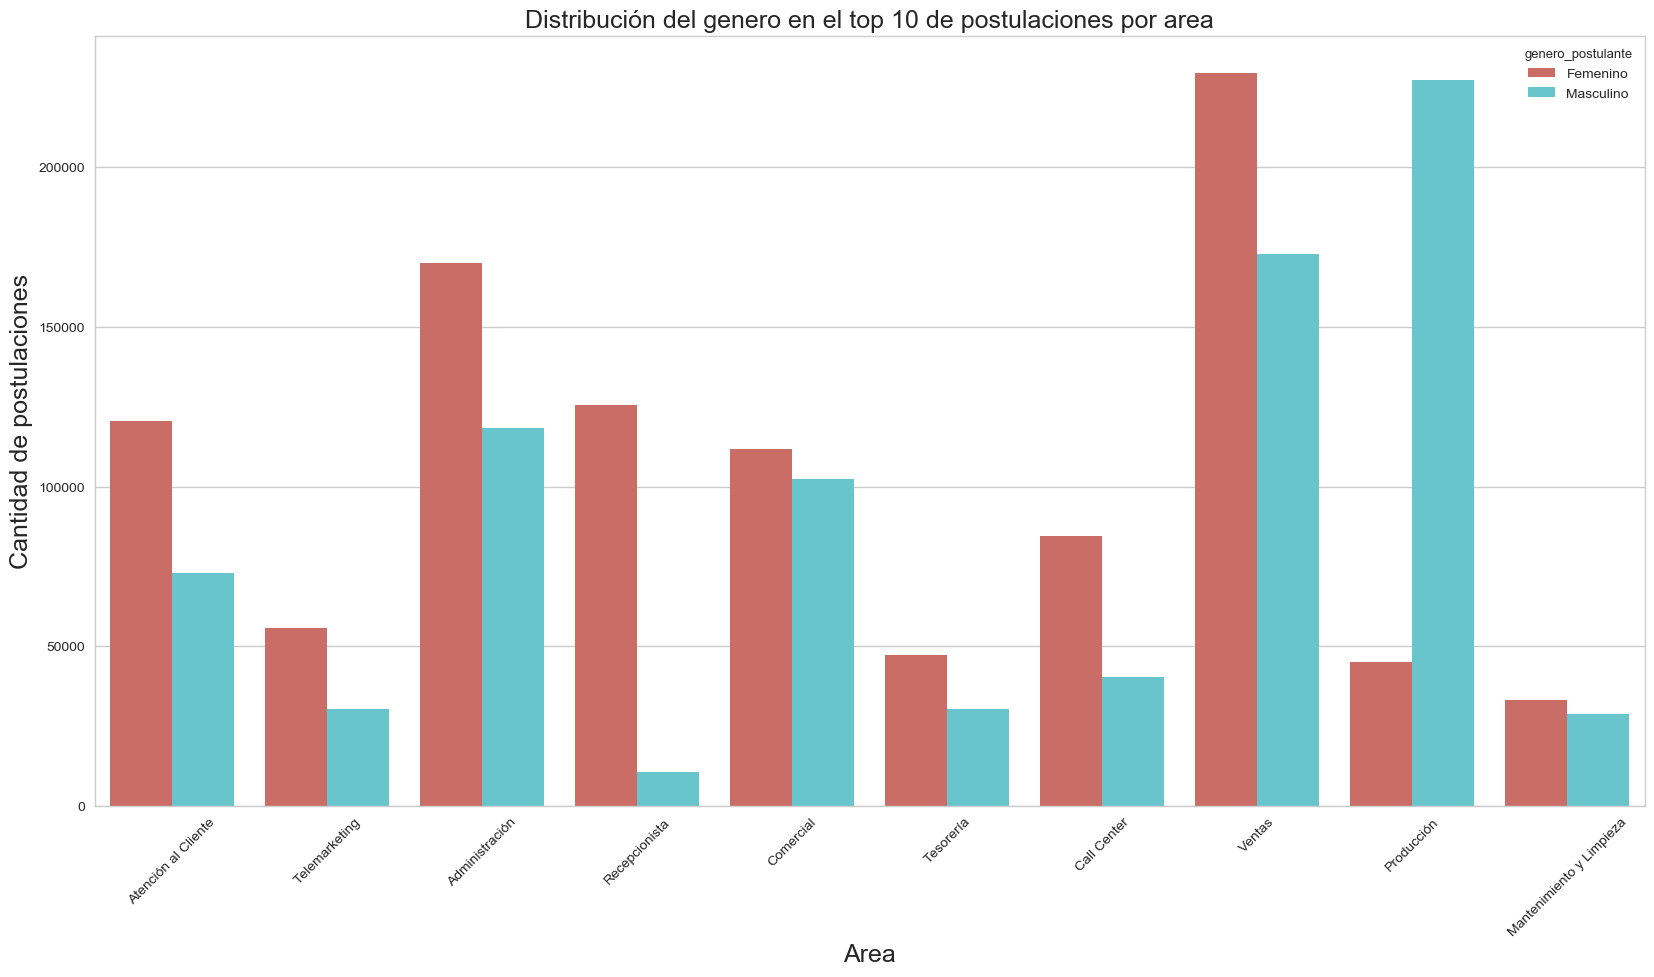

In [66]:
g = sns.countplot(x="nombre_area", hue="genero_postulante", data=top_10_postulaciones, palette="hls")
g.set_title("Distribución del genero en el top 10 de postulaciones por area", fontsize=18)
g.set_xlabel("Area", fontsize=18)
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.set_ylabel("Cantidad de postulaciones", fontsize=18)

# Postulaciones en Sistemas

In [86]:
#postulaciones_produccion = postulaciones[postulaciones['nombre_area']=='Producción']
#postulaciones_ventas = postulaciones[postulaciones['nombre_area']=='Ventas']
#postulaciones_comercial = postulaciones[postulaciones['nombre_area']=='Comercial']
#postulaciones_administracion = postulaciones[postulaciones['nombre_area']=='Administración']
#postulaciones_produccion['titulo'].value_counts().head(50)
#postulaciones_ventas['titulo'].value_counts().head(20)
#postulaciones_comercial['titulo'].value_counts().head(20)
#postulaciones_administracion['titulo'].value_counts().head(20)
#postulaciones_varones['nombre_area'].value_counts()
postulaciones_tecnologia=postulaciones[postulaciones['nombre_area']=='Tecnologia / Sistemas']
postulaciones_tecnologia['titulo'].value_counts().head(20)

Analista Funcional                                             537
Tecnico de PC                                                  396
Técnico de redes y soporte a usuarios                          385
Analista Jr. de Procesos IT                                    372
Sales & Community Manager                                      356
Soporte Técnico en Informatica                                 308
Analista Mesa de Ayuda                                         283
Consultores SAP ( PM/MM/FI )                                   266
Técnico Instalador                                             264
Analista de calidad                                            264
Consultor BI Jr / Desarrollador Jr                             258
Profesionales SAP - La Plata - Rosario - Buenos Aires          258
 Analista de Soporte de Microinformática                       252
Analista junior para área Experiencia de Cliente (Martínez)    229
Analista de Procesos (IT)                                     

# La computadora es para el varón

Text(0.5,1,'Cantidad de postulaciones a sistemas por género')

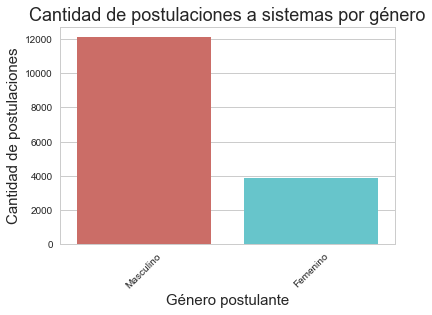

In [87]:
g = sns.countplot(x='genero_postulante', data=postulaciones_tecnologia, orient='v', palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Género postulante", fontsize=15)
g.set_ylabel("Cantidad de postulaciones", fontsize=15)
g.set_title("Cantidad de postulaciones a sistemas por género", fontsize=18)

In [91]:
postulaciones_tecnologia['genero_postulante'].value_counts('mean')

Masculino    0.758757
Femenino     0.241243
Name: genero_postulante, dtype: float64

Text(34,0.5,'Nivel Laboral')

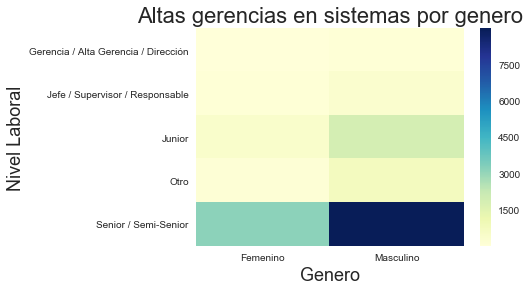

In [88]:
heatmap_tecnologia = postulaciones_tecnologia.pivot_table(index='nivel_laboral', columns='genero_postulante', values='id_postulante', aggfunc='count')

g = sns.heatmap(heatmap_tecnologia,  cmap="YlGnBu")
g.set_title("Altas gerencias en sistemas por genero", fontsize=22)
g.set_xlabel("Genero",fontsize=18)
g.set_ylabel("Nivel Laboral", fontsize=18)

Text(0.5,1,'Cantidad de postulaciones a posiciones gerenciales')

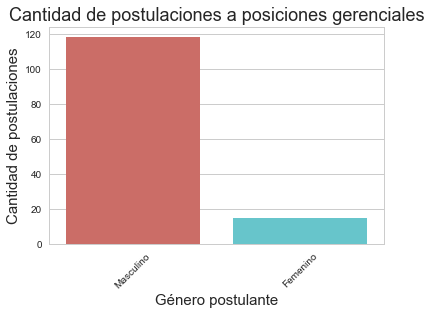

In [89]:
postulaciones_gerenciales_tecnologia=postulaciones_tecnologia[postulaciones_tecnologia['nivel_laboral']=='Gerencia / Alta Gerencia / Dirección']


g = sns.countplot(x='genero_postulante', data=postulaciones_gerenciales_tecnologia, orient='v', palette="hls")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("Género postulante", fontsize=15)
g.set_ylabel("Cantidad de postulaciones", fontsize=15)
g.set_title("Cantidad de postulaciones a posiciones gerenciales", fontsize=18)

In [92]:
postulaciones_gerenciales_tecnologia['genero_postulante'].value_counts('mean')

Masculino    0.887218
Femenino     0.112782
Name: genero_postulante, dtype: float64

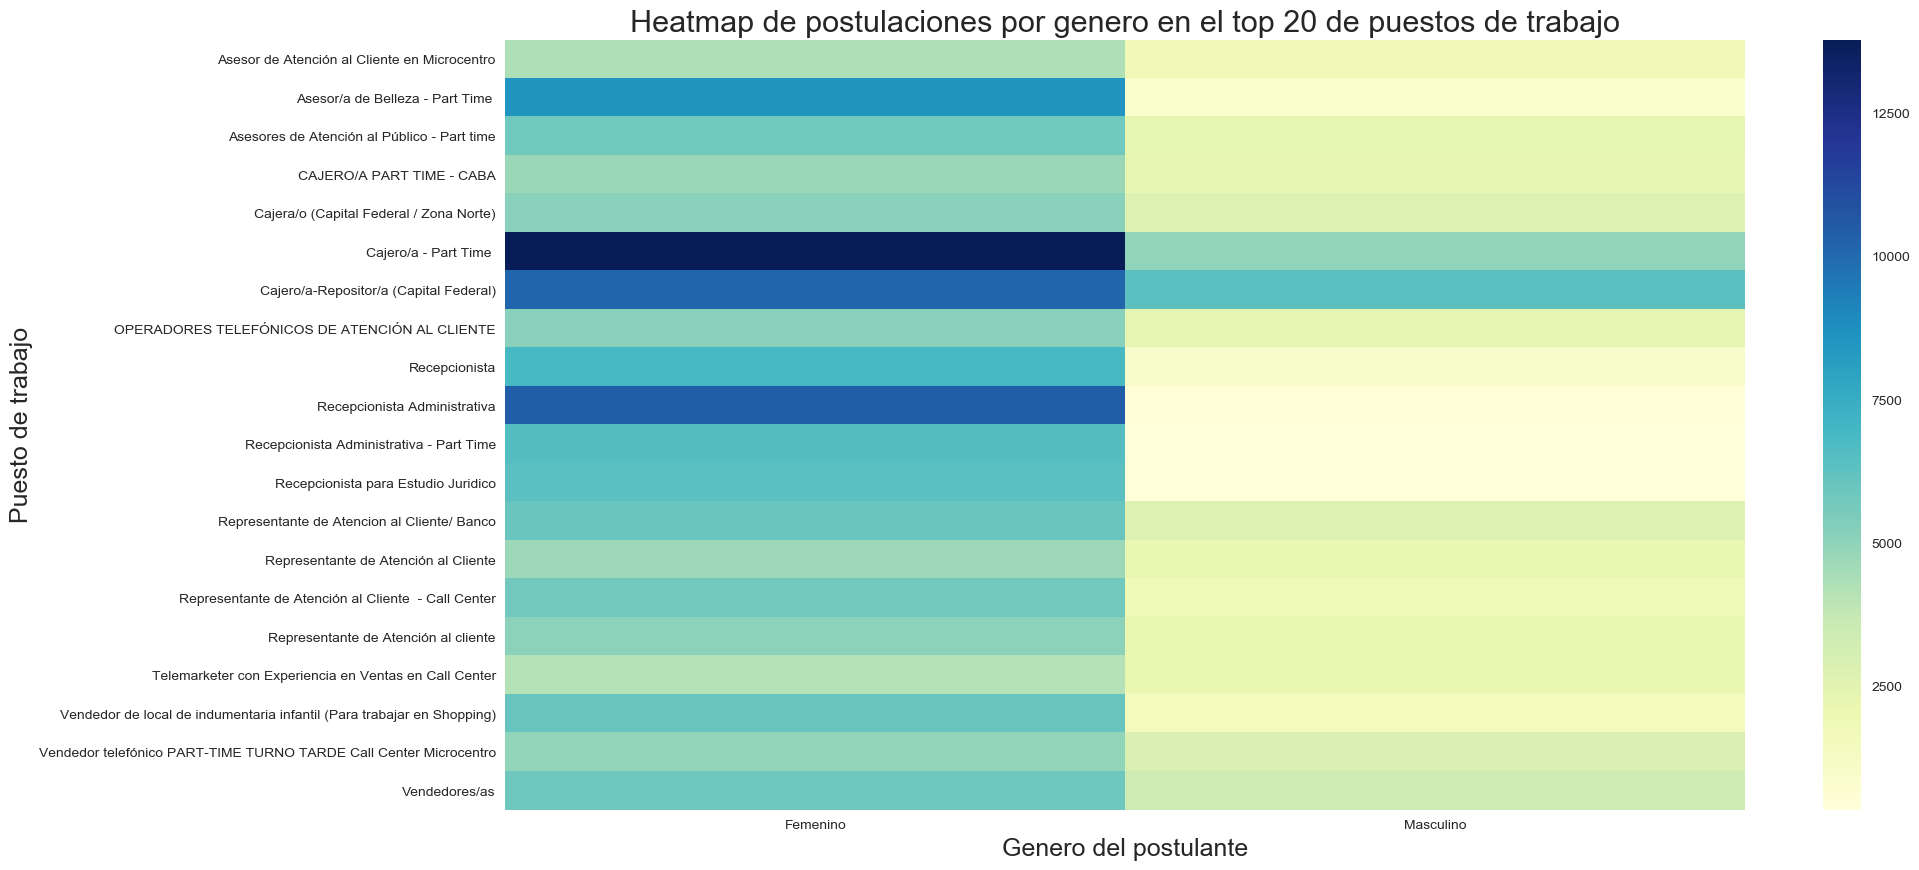

In [42]:
top_20_postulaciones_puestos = get_top_for(postulaciones, 'titulo', 20)
for_heatmap = top_20_postulaciones_puestos.pivot_table(index='titulo', columns='genero_postulante', values='id_aviso', aggfunc='count')
g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Heatmap de postulaciones por genero en el top 20 de puestos de trabajo", fontsize=22)
g.set_xlabel("Genero del postulante",fontsize=18)
g.set_ylabel("Puesto de trabajo", fontsize=18)

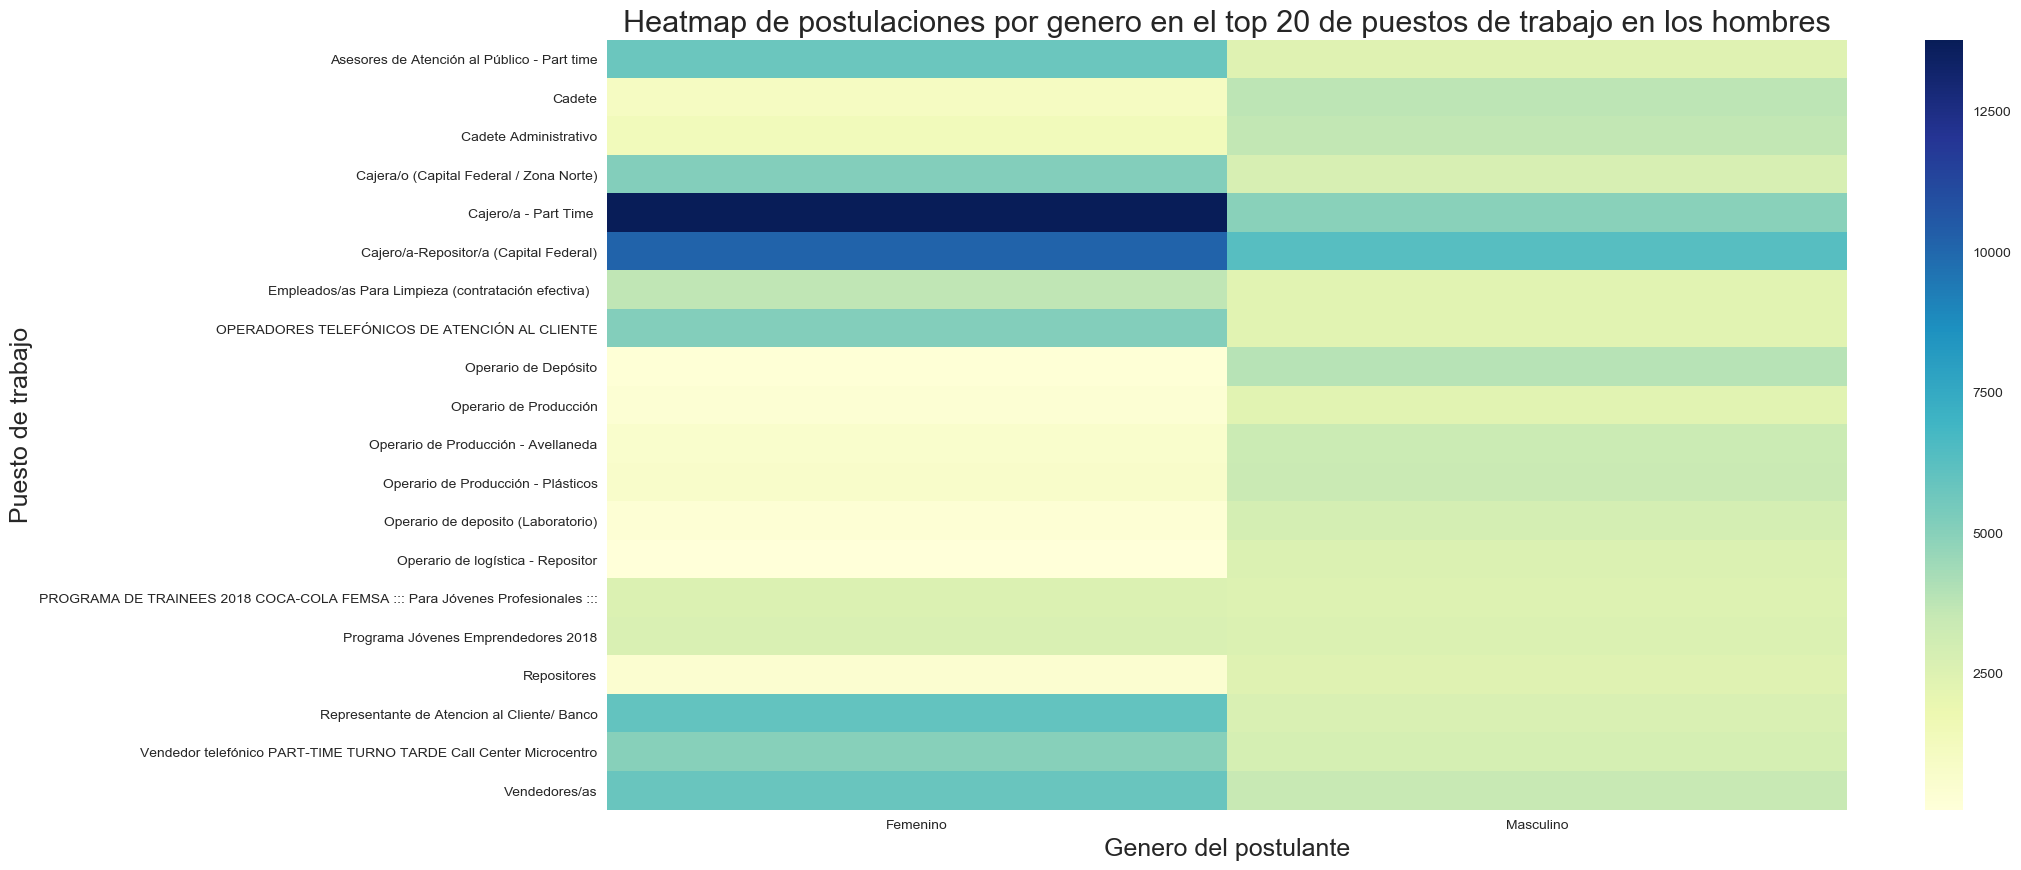

In [45]:
top_20_puestos_hombres=postulaciones[postulaciones['genero_postulante']=='Masculino']['titulo'].value_counts().head(20).index
top_20_postulaciones_puestos = postulaciones[postulaciones['titulo'].isin(top_20_puestos_hombres)]
for_heatmap = top_20_postulaciones_puestos.pivot_table(index='titulo', columns='genero_postulante', values='id_aviso', aggfunc='count')
g = sns.heatmap(for_heatmap,  cmap="YlGnBu")
g.set_title("Heatmap de postulaciones por genero en el top 20 de puestos de trabajo en los hombres", fontsize=22)
g.set_xlabel("Genero del postulante",fontsize=18)
g.set_ylabel("Puesto de trabajo", fontsize=18)